In [105]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import cv2

np.random.seed(42)


In [106]:
root_path = os.path.join(os.path.abspath('..'),"data", "chest_xray")
folders = ('test', 'train', 'val')
img_types = ('NORMAL', 'PNEUMONIA')

def generate_images_list(image_type, sample_size=10):
    images = list()
    for folder in folders:
        path = os.path.join(root_path, folder, img_type)
        images += [os.path.join(path, f) for f in os.listdir(path)]
    images = tuple(images)
    return np.random.choice(images,sample_size,replace=False)

In [107]:
img_sample = 10
images = np.zeros((img_sample,len(img_types)),dtype="U256")
for column, img_type in enumerate(img_types):
    img_list = generate_images_list(img_type, img_sample)
    for row, img in enumerate(img_list):
        images[row, column] = img

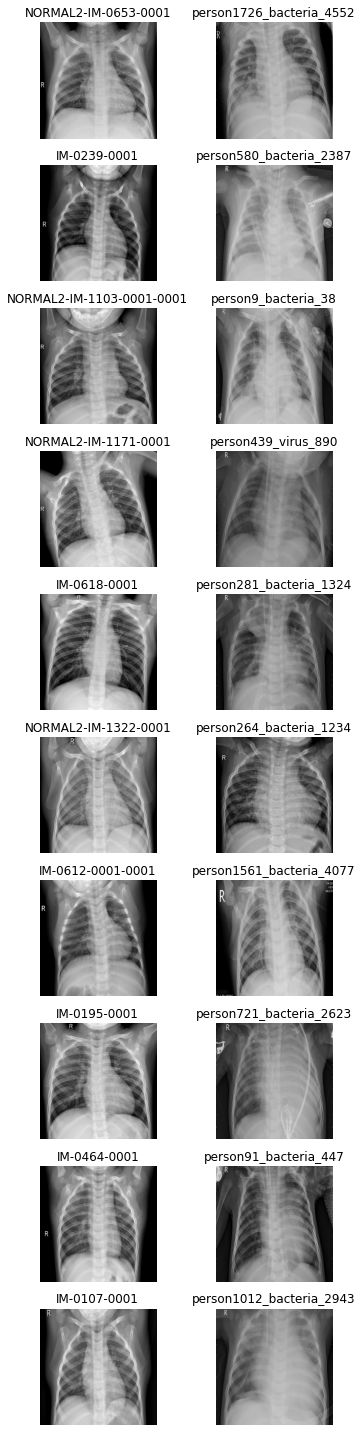

In [128]:
fig:plt.Figure = plt.figure(figsize=(img_sample*10/2,2*10),dpi=72)
for i in range(img_sample):
    for j in range(len(img_types)):
        plot_pos = i*2 + j + 1
        img = images[i,j]
        ax: plt.Axes = fig.add_subplot(img_sample,2,plot_pos)
        ax.axis("off")
        img_ar = cv2.imread(img)
        img_ar = cv2.resize(img_ar, (512,512))
        cv2.cvtColor(img_ar, cv2.COLOR_BGR2GRAY)
        ax.imshow(img_ar, cmap="gray")
        ax.set_title(img.split(".")[0].split("\\")[-1].split("/")[-1])
plt.tight_layout(w_pad=-205)
plt.show()

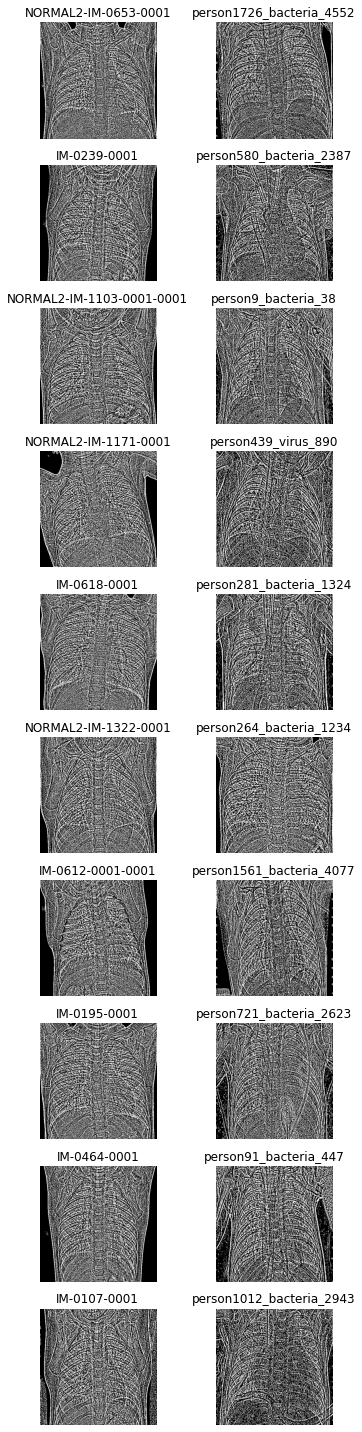

In [163]:

fig:plt.Figure = plt.figure(figsize=(img_sample*10/2,2*10),dpi=72)
for i in range(img_sample):
    for j in range(len(img_types)):
        plot_pos = i*2 + j + 1
        img = images[i,j]
        ax: plt.Axes = fig.add_subplot(img_sample,2,plot_pos)
        ax.axis("off")
        img_ar = cv2.imread(img)
        cv2.cvtColor(img_ar, cv2.COLOR_BGR2GRAY)
        img_ar = cv2.resize(img_ar, (512,512))
        img_ar = img_ar - cv2.bilateralFilter(img_ar,9,55,99)

        # img_ar = cv2.GaussianBlur(img_ar,(21,21),10)
        ax.imshow(img_ar, cmap="gray")
        ax.set_title(img.split(".")[0].split("\\")[-1].split("/")[-1])
plt.tight_layout(w_pad=-205)
plt.show()
